In [2]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.Collecting catboost
  Using cached catboost-1.2.1-cp310-cp310-win_amd64.whl (101.0 MB)
     -------------------------------------- 47.0/47.0 kB 181.3 kB/s eta 0:00:00



In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from statistics import mean
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import PowerTransformer,LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.utils import resample

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score, roc_auc_score,roc_curve,confusion_matrix


from sklearn import metrics 
from sklearn.model_selection import  train_test_split, RepeatedStratifiedKFold, cross_val_score
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer, KNNImputer
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler,RobustScaler
from sklearn.compose import ColumnTransformer
from catboost import CatBoostClassifier

warnings.filterwarnings("ignore")
%matplotlib inline

## Read data

In [2]:
# load the dataset

path = "E:/Ineuron ML Projects/jupyter notebook/aps_failure_training_set1.csv"
df = pd.read_csv(path,na_values = "na")
df.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,pos,153204,0.0,182.0,NaN,0.0,0.0,0.0,0.0,0.0,...,129862.0,26872.0,34044.0,22472.0,34362.0,0.0,0.0,0.0,0.0,0.0
1,pos,453236,NaN,2926.0,NaN,0.0,0.0,0.0,0.0,222.0,...,7908038.0,3026002.0,5025350.0,2025766.0,1160638.0,533834.0,493800.0,6914.0,0.0,0.0
2,pos,72504,NaN,1594.0,1052.0,0.0,0.0,0.0,244.0,178226.0,...,1432098.0,372252.0,527514.0,358274.0,332818.0,284178.0,3742.0,0.0,0.0,0.0
3,pos,762958,NaN,NaN,NaN,NaN,NaN,776.0,281128.0,2186308.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,pos,695994,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,...,1397742.0,495544.0,361646.0,28610.0,5130.0,212.0,0.0,0.0,NaN,NaN


In [3]:
# check rows and columns of the dataset

df.shape

(36188, 171)

In [4]:
# check unique values of target variable

df["class"].value_counts()

neg    35188
pos     1000
Name: class, dtype: int64

In [5]:
df.dtypes

class      object
aa_000      int64
ab_000    float64
ac_000    float64
ad_000    float64
           ...   
ee_007    float64
ee_008    float64
ee_009    float64
ef_000    float64
eg_000    float64
Length: 171, dtype: object

In [6]:
df.columns

Index(['class', 'aa_000', 'ab_000', 'ac_000', 'ad_000', 'ae_000', 'af_000',
       'ag_000', 'ag_001', 'ag_002',
       ...
       'ee_002', 'ee_003', 'ee_004', 'ee_005', 'ee_006', 'ee_007', 'ee_008',
       'ee_009', 'ef_000', 'eg_000'],
      dtype='object', length=171)

In [7]:
# define numerical and categorical columns
numerical_columns = [feature for feature in df.columns if df[feature].dtype != "O"]
categorical_columns = [feature for feature in df.columns if df[feature].dtype == "O"]

In [8]:
print(f"we have {len(numerical_columns)} numerical features : {numerical_columns}")
print(f"we have {len(categorical_columns)} numerical features : {categorical_columns}")

we have 170 numerical features : ['aa_000', 'ab_000', 'ac_000', 'ad_000', 'ae_000', 'af_000', 'ag_000', 'ag_001', 'ag_002', 'ag_003', 'ag_004', 'ag_005', 'ag_006', 'ag_007', 'ag_008', 'ag_009', 'ah_000', 'ai_000', 'aj_000', 'ak_000', 'al_000', 'am_0', 'an_000', 'ao_000', 'ap_000', 'aq_000', 'ar_000', 'as_000', 'at_000', 'au_000', 'av_000', 'ax_000', 'ay_000', 'ay_001', 'ay_002', 'ay_003', 'ay_004', 'ay_005', 'ay_006', 'ay_007', 'ay_008', 'ay_009', 'az_000', 'az_001', 'az_002', 'az_003', 'az_004', 'az_005', 'az_006', 'az_007', 'az_008', 'az_009', 'ba_000', 'ba_001', 'ba_002', 'ba_003', 'ba_004', 'ba_005', 'ba_006', 'ba_007', 'ba_008', 'ba_009', 'bb_000', 'bc_000', 'bd_000', 'be_000', 'bf_000', 'bg_000', 'bh_000', 'bi_000', 'bj_000', 'bk_000', 'bl_000', 'bm_000', 'bn_000', 'bo_000', 'bp_000', 'bq_000', 'br_000', 'bs_000', 'bt_000', 'bu_000', 'bv_000', 'bx_000', 'by_000', 'bz_000', 'ca_000', 'cb_000', 'cc_000', 'cd_000', 'ce_000', 'cf_000', 'cg_000', 'ch_000', 'ci_000', 'cj_000', 'ck_000'

### As this is a Sensor data. Interpretation of the data is not required 


## checking for missing values

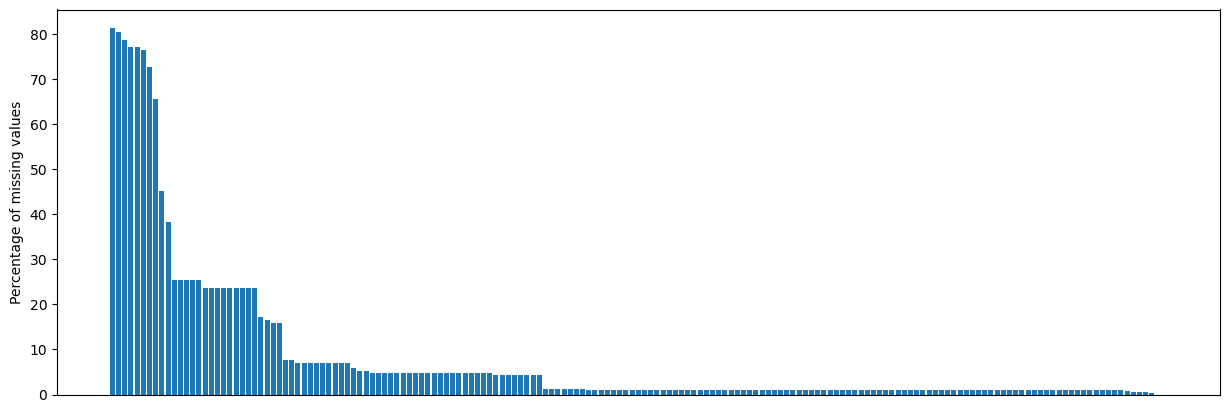

In [25]:
# plotting missing values count for each column

fig,ax = plt.subplots(figsize=(15,5))

missing = df.isna().sum().div(df.shape[0]).mul(100).to_frame().sort_values(by=0,ascending = False)

ax.bar(missing.index,missing.values.T[0])
plt.xticks([])
plt.ylabel("Percentage of missing values")
plt.show()

In [36]:
missing = pd.DataFrame(df.isna().sum().div(df.shape[0]).mul(100).sort_values(ascending=False))

## Dropping columns which has 70% of missing values

In [48]:
drop_columns = missing[missing[0]>70]
drop_columns

,0
br_000,81.410965
bq_000,80.501824
bp_000,78.794075
ab_000,77.086327
cr_000,77.086327
bo_000,76.533658
bn_000,72.761689


In [56]:
df.drop(list(drop_columns.index),axis=1,inplace=True)

In [57]:
# checking the shape of the dataset after dropping columns
df.shape

(36188, 164)

### Check the total percentage of missing values of full dataset after dropping columns with more than 70% of missing values

In [64]:
total_missing_values = df.isna().sum().sum()
total_values = np.product(df.shape)
print(f"Total percentage of missing values after dropping some columns : {(total_missing_values/total_values)*100} %")

Total percentage of missing values after dropping some columns : 5.37059852747306 %


## Visualizing unique values in the Target feature

In [76]:
df["class"].value_counts()

neg    35188
pos     1000
Name: class, dtype: int64

In [75]:
df["class"][df["class"] == 'pos'].value_counts()

pos    1000
Name: class, dtype: int64

In [77]:
pos = df[df["class"] == "pos"].shape[0]
neg = df[df["class"] == "neg"].shape[0]

No.of positive classes : 1000
No.of negative classes : 35188


positive classes : 1000, negative classes : 35188


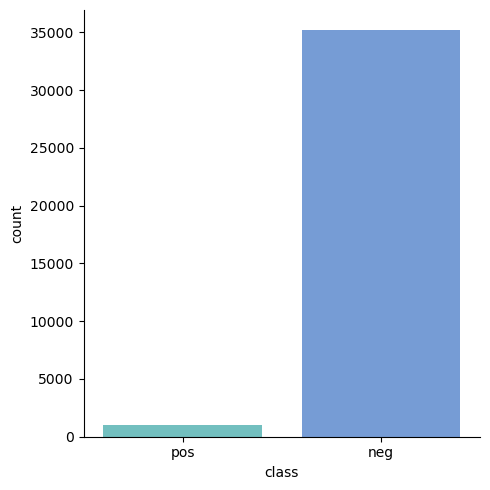

In [80]:
print(f"positive classes : {pos}, negative classes : {neg}")
sns.catplot(data=df, x="class", kind="count", palette="winter_r", alpha=.6)
plt.show()

**Report**
- The target classes are highly imbalanced
- Class imbalance is a scenario that arises when we have unequal distribution of class in a dataset i.e. the no. of data points in the negative class (majority class) very large compared to that of the positive class (minority class)
- If the imbalanced data is not treated beforehand, then this will degrade the performance of the classifier model. 
- Hence we should handle imbalanced data with certain methods.

**How to handle Imbalance Data ?**

- Resampling data is one of the most commonly preferred approaches to deal with an imbalanced dataset. There are broadly two types of methods for this i) Undersampling ii) Oversampling. In most cases, oversampling is preferred over undersampling techniques. The reason being, in undersampling we tend to remove instances from data that may be carrying some important information.
- **SMOTE:** Synthetic Minority Oversampling Technique
- SMOTE is an oversampling technique where the synthetic samples are generated for the minority class.
- Hybridization techniques involve combining both undersampling and oversampling techniques. This is done to optimize the performance of classifier models for the samples created as part of these techniques.
- It only duplicates the data and it won't add any new information. Hence we look at some different techniques.

## Create Functions for model training and evaluation


In [81]:
def evaluate_cls(true,predicted):
    """
    This function takes in true values and predicted values 
    Returns : Accuracy,F1-score,Precision,Recall,ROC-AUC score
    """

    acc = accuracy_score(true,predicted) # calculate accuracy
    f1 = f1_score(true,predicted) # calculate f1-score
    precision = precision_score(true,predicted) # calculate precision
    recall = recall_score(true,predicted) # calculate recall
    roc_auc = roc_auc_score(true,predicted) # calculate roc_auc
    return acc,f1,precision,recall,roc_auc

